In [1]:
import sqlite3

def initialize_database():
    # Connect to SQLite database (or create it if it doesn't exist)
    conn = sqlite3.connect('ai_guard.db')
    cursor = conn.cursor()

    # Create a table for authorized individuals
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS authorized_individuals (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT NOT NULL,
            image_path TEXT NOT NULL
        )
    ''')

    conn.commit()
    conn.close()
    print("Database initialized and table created.")


def add_authorized_individual(name, image_path):
    conn = sqlite3.connect('ai_guard.db')
    cursor = conn.cursor()

    # Insert an authorized individual into the database
    cursor.execute('''
        INSERT INTO authorized_individuals (name, image_path)
        VALUES (?, ?)
    ''', (name, image_path))

    conn.commit()
    conn.close()
    print(f"Authorized individual '{name}' added.")


def list_authorized_individuals():
    conn = sqlite3.connect('ai_guard.db')
    cursor = conn.cursor()

    # Retrieve all authorized individuals
    cursor.execute('''
        SELECT * FROM authorized_individuals
    ''')

    individuals = cursor.fetchall()
    conn.close()

    print("Authorized Individuals:")
    for individual in individuals:
        print(f"ID: {individual[0]}, Name: {individual[1]}, Image Path: {individual[2]}")

# Initialize the database (run this once to set up the database)
if __name__ == "__main__":
    initialize_database()

    # Example usage
    # add_authorized_individual("John Doe", "images/john_doe.jpg")
    # list_authorized_individuals()


Database initialized and table created.


In [2]:
pip install --upgrade setuptools

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 80.4.0
    Uninstalling setuptools-80.4.0:
      Successfully uninstalled setuptools-80.4.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install git+https://github.com/ageitgey/face_recognition_models


  Cloning https://github.com/ageitgey/face_recognition_models to c:\users\wiam\appdata\local\temp\pip-req-build-vxajmzn0
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] Le fichier spécifié est introuvable while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [4]:
pip install face_recognition


Note: you may need to restart the kernel to use updated packages.


In [5]:
try:
    import face_recognition
    print("face_recognition module is installed and ready to use!")
except ImportError as e:
    print(f"Error: {e}")


face_recognition module is installed and ready to use!


In [6]:
add_authorized_individual("John Doe", "path/to/john_doe.jpg")
add_authorized_individual("Jane Smith", "path/to/jane_smith.jpg")

Authorized individual 'John Doe' added.
Authorized individual 'Jane Smith' added.


In [7]:
list_authorized_individuals()

Authorized Individuals:
ID: 1, Name: John Doe, Image Path: path/to/john_doe.jpg
ID: 2, Name: Jane Smith, Image Path: path/to/jane_smith.jpg


In [8]:
import cv2
import face_recognition
import sqlite3
import os

def load_authorized_faces():
    conn = sqlite3.connect('ai_guard.db')
    cursor = conn.cursor()

    cursor.execute('''
        SELECT name, image_path FROM authorized_individuals
    ''')
    individuals = cursor.fetchall()
    conn.close()

    authorized_faces = []
    authorized_names = []

    for name, image_path in individuals:
        if os.path.exists(image_path):
            image = face_recognition.load_image_file(image_path)
            face_encoding = face_recognition.face_encodings(image)
            if face_encoding:
                authorized_faces.append(face_encoding[0])
                authorized_names.append(name)
    return authorized_faces, authorized_names

def recognize_faces_from_camera():
    # Load authorized faces and their names
    authorized_faces, authorized_names = load_authorized_faces()

    if not authorized_faces:
        print("No authorized faces found in the database.")
        return

    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    print("Starting live face recognition...")
    while True:
        ret, frame = video_capture.read()
        if not ret:
            print("Failed to capture video frame.")
            break

        # Convert the image from BGR color (OpenCV) to RGB color (face_recognition)
        rgb_frame = frame[:, :, ::-1]

        # Find all face locations and face encodings in the frame
        face_locations = face_recognition.face_locations(rgb_frame)
        face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

        for face_encoding, face_location in zip(face_encodings, face_locations):
            # Check if the face is a match for any authorized face
            matches = face_recognition.compare_faces(authorized_faces, face_encoding)
            name = "Unknown"

            if True in matches:
                first_match_index = matches.index(True)
                name = authorized_names[first_match_index]

            # Draw a rectangle around the face
            top, right, bottom, left = face_location
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0) if name != "Unknown" else (0, 0, 255), 2)

            # Label the face
            cv2.putText(frame, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

            if name == "Unknown":
                print("Unauthorized individual detected.")

        # Display the resulting image
        cv2.imshow('Video', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release video capture and close all OpenCV windows
    video_capture.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    recognize_faces_from_camera()


No authorized faces found in the database.


In [1]:
import cv2
import time

def capture_three_images():
    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    # Give user time to get ready
    print("Getting ready to capture images...")
    time.sleep(2)

    # Capture Front Image
    print("Please face the camera and press 'c' to capture the front image.")
    while True:
        ret, frame = video_capture.read()
        cv2.imshow('Capture Front Image', frame)
        if cv2.waitKey(1) & 0xFF == ord('c'):
            cv2.imwrite("front_image.jpg", frame)
            print("Front image captured.")
            break

    # Give user time to reposition for left side picture
    print("Now turn to your left side and press 'c' to capture the left side image.")
    time.sleep(2)
    while True:
        ret, frame = video_capture.read()
        cv2.imshow('Capture Left Side Image', frame)
        if cv2.waitKey(1) & 0xFF == ord('c'):
            cv2.imwrite("left_side_image.jpg", frame)
            print("Left side image captured.")
            break

    # Give user time to reposition for right side picture
    print("Now turn to your right side and press 'c' to capture the right side image.")
    time.sleep(2)
    while True:
        ret, frame = video_capture.read()
        cv2.imshow('Capture Right Side Image', frame)
        if cv2.waitKey(1) & 0xFF == ord('c'):
            cv2.imwrite("right_side_image.jpg", frame)
            print("Right side image captured.")
            break

    # Release video capture and close all OpenCV windows
    video_capture.release()
    cv2.destroyAllWindows()

# Test the function
capture_three_images()


Getting ready to capture images...
Please face the camera and press 'c' to capture the front image.
Front image captured.
Now turn to your left side and press 'c' to capture the left side image.
Left side image captured.
Now turn to your right side and press 'c' to capture the right side image.
Right side image captured.


In [2]:
import cv2
import time

def capture_and_show_images():
    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    # Give user time to get ready
    print("Getting ready to capture images...")
    time.sleep(2)

    # Capture and show Front Image
    print("Please face the camera and press 'c' to capture the front image.")
    while True:
        ret, frame = video_capture.read()
        cv2.imshow('Capture Front Image', frame)
        if cv2.waitKey(1) & 0xFF == ord('c'):
            cv2.imwrite("front_image.jpg", frame)
            print("Front image captured.")
            cv2.imshow("Front Image", frame)  # Show the captured front image
            cv2.waitKey(0)  # Wait for user to close the window
            break

    # Give user time to reposition for left side picture
    print("Now turn to your left side and press 'c' to capture the left side image.")
    time.sleep(2)
    while True:
        ret, frame = video_capture.read()
        cv2.imshow('Capture Left Side Image', frame)
        if cv2.waitKey(1) & 0xFF == ord('c'):
            cv2.imwrite("left_side_image.jpg", frame)
            print("Left side image captured.")
            cv2.imshow("Left Side Image", frame)  # Show the captured left side image
            cv2.waitKey(0)  # Wait for user to close the window
            break

    # Give user time to reposition for right side picture
    print("Now turn to your right side and press 'c' to capture the right side image.")
    time.sleep(2)
    while True:
        ret, frame = video_capture.read()
        cv2.imshow('Capture Right Side Image', frame)
        if cv2.waitKey(1) & 0xFF == ord('c'):
            cv2.imwrite("right_side_image.jpg", frame)
            print("Right side image captured.")
            cv2.imshow("Right Side Image", frame)  # Show the captured right side image
            cv2.waitKey(0)  # Wait for user to close the window
            break

    # Release video capture and close all OpenCV windows
    video_capture.release()
    cv2.destroyAllWindows()

# Test the function
capture_and_show_images()


Getting ready to capture images...
Please face the camera and press 'c' to capture the front image.
Front image captured.
Now turn to your left side and press 'c' to capture the left side image.
Left side image captured.
Now turn to your right side and press 'c' to capture the right side image.
Right side image captured.


In [3]:
import cv2
import sqlite3
import numpy as np

def save_image_to_db(image_name, image_array, name):
    # Convert the NumPy array to a binary format (BLOB)
    _, img_encoded = cv2.imencode('.jpg', image_array)
    img_binary = img_encoded.tobytes()

    # Connect to the SQLite database
    conn = sqlite3.connect('authorized_faces.db')
    cursor = conn.cursor()

    # Insert the image as BLOB along with the name
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS authorized_faces (
            name TEXT,
            image BLOB
        )
    ''')

    cursor.execute('''
        INSERT INTO authorized_faces (name, image)
        VALUES (?, ?)
    ''', (name, img_binary))

    conn.commit()
    conn.close()
    print(f"Image for {name} saved to database.")

def capture_and_store_images():
    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    # Give user time to get ready
    print("Getting ready to capture images...")
    time.sleep(2)

    def capture_image(image_name, prompt, name):
        # Capture and show image
        print(prompt)
        while True:
            ret, frame = video_capture.read()
            cv2.imshow(f'Capture {image_name}', frame)
            if cv2.waitKey(1) & 0xFF == ord('c'):
                # Store the image in the database as a NumPy array
                save_image_to_db(image_name, frame, name)
                print(f"{image_name} image captured and saved to database.")
                cv2.imshow(f"{image_name} Image", frame)  # Show the captured image
                cv2.waitKey(0)  # Wait for user to close the window
                break

    # Capture and store Front Image
    name = input("Enter the name of the person: ")
    capture_image("front_image", "Please face the camera and press 'c' to capture the front image.", name)

    # Give user time to reposition for left side picture
    print("Now turn to your left side and press 'c' to capture the left side image.")
    time.sleep(2)
    # Capture and store Left Side Image
    capture_image("left_side_image", "Now turn to your left side and press 'c' to capture the left side image.", name)

    # Give user time to reposition for right side picture
    print("Now turn to your right side and press 'c' to capture the right side image.")
    time.sleep(2)
    # Capture and store Right Side Image
    capture_image("right_side_image", "Now turn to your right side and press 'c' to capture the right side image.", name)

    # Release video capture and close all OpenCV windows
    video_capture.release()
    cv2.destroyAllWindows()

# Test the function
capture_and_store_images()


Getting ready to capture images...
Please face the camera and press 'c' to capture the front image.
Image for WIAME_EL_HAFID saved to database.
front_image image captured and saved to database.
Now turn to your left side and press 'c' to capture the left side image.
Now turn to your left side and press 'c' to capture the left side image.
Image for WIAME_EL_HAFID saved to database.
left_side_image image captured and saved to database.
Now turn to your right side and press 'c' to capture the right side image.
Now turn to your right side and press 'c' to capture the right side image.
Image for WIAME_EL_HAFID saved to database.
right_side_image image captured and saved to database.


In [ ]:
import cv2
import sqlite3
import numpy as np
import time
from IPython.display import Image, display

def save_image_to_db(image_name, image_array, name):
    """Saves the captured image to the SQLite database."""
    _, img_encoded = cv2.imencode('.jpg', image_array)
    img_binary = img_encoded.tobytes()

    # Connect to the SQLite database
    conn = sqlite3.connect('authorized_faces.db')
    cursor = conn.cursor()

    # Create table if it doesn't exist
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS authorized_faces (
            name TEXT,
            image BLOB
        )
    ''')

    # Insert the image as BLOB into the database
    cursor.execute('''
        INSERT INTO authorized_faces (name, image)
        VALUES (?, ?)
    ''', (name, img_binary))

    conn.commit()
    conn.close()
    print(f"Image for {name} saved to database.")

def capture_and_store_images():
    """Handles the image capture process."""
    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    # Give user time to get ready
    print("Getting ready to capture images...")
    time.sleep(2)

    def capture_image(name, image_name):
        print(f"Please position yourself for the {image_name} and press 'y' when ready to capture.")
        for trial in range(3):  # Limit to 3 trials
            print(f"Trial {trial + 1}/3: ")
            ret, frame = video_capture.read()
            if ret:
                # Simulate showing the image using IPython display
                cv2.imwrite(f"{image_name}.jpg", frame)  # Save the image temporarily
                display(Image(filename=f"{image_name}.jpg"))  # Display it in the notebook
                confirm = input(f"Do you like this {image_name}? (y/n): ").lower()
                if confirm == 'y':
                    save_image_to_db(image_name, frame, name)
                    print(f"{image_name} saved.")
                    break  # Exit the loop if user confirms the image
                else:
                    print(f"Retaking the {image_name} image.")
                    continue  # Retake the image if rejected
            else:
                print("Failed to capture image. Try again.")
                continue
        else:
            print(f"Failed to capture {image_name} after 3 trials. Moving to next image.")

    # User inputs their name
    name = input("Enter the name of the person: ")

    # Capture front image
    capture_image(name, "front_image")

    # Capture left side image
    print("Please turn to your left side.")
    time.sleep(2)
    capture_image(name, "left_side_image")

    # Capture right side image
    print("Please turn to your right side.")
    time.sleep(2)
    capture_image(name, "right_side_image")

    # Release video capture and close all OpenCV windows
    video_capture.release()
    cv2.destroyAllWindows()

# Test the function
capture_and_store_images()


Getting ready to capture images...
Please position yourself for the front_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing front_image...


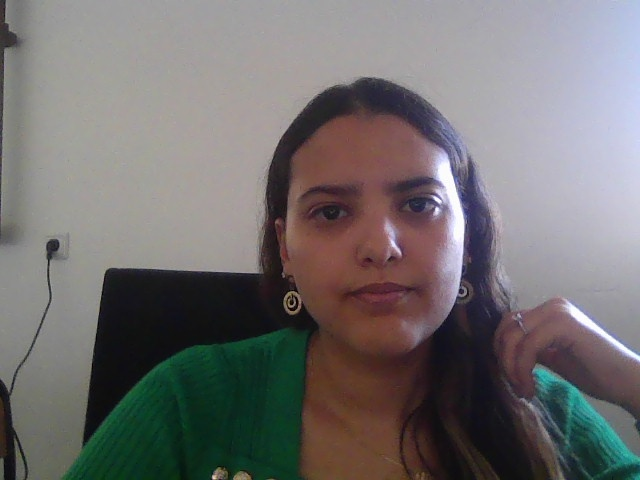

Image for WIAME_EL_HAFID saved to database.
front_image saved.
Please turn to your left side.
Please position yourself for the left_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing left_side_image...


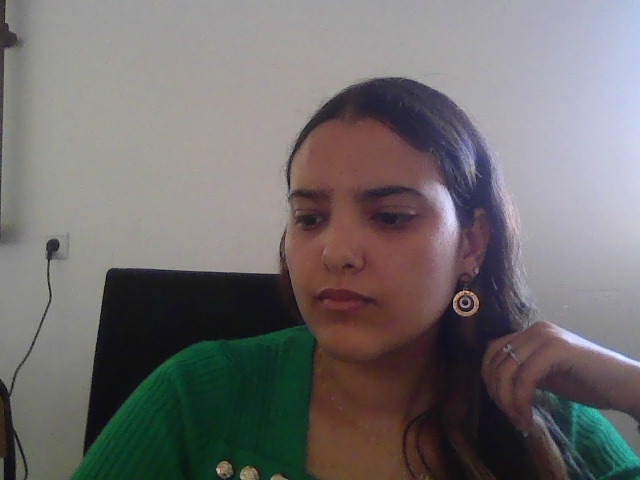

Image for WIAME_EL_HAFID saved to database.
left_side_image saved.
Please turn to your right side.
Please position yourself for the right_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing right_side_image...


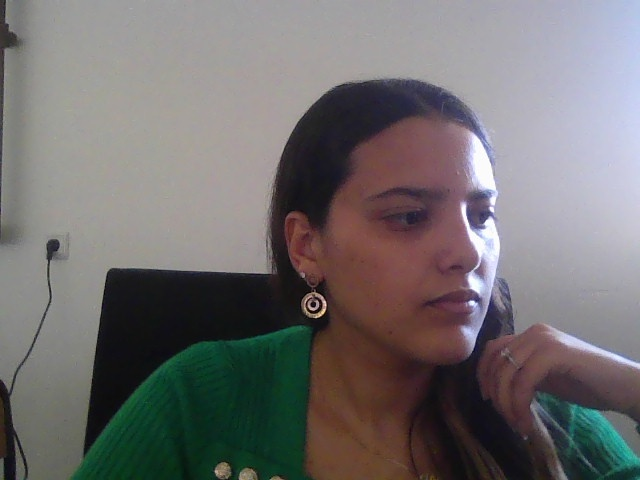

Image for WIAME_EL_HAFID saved to database.
right_side_image saved.


In [3]:
import cv2
import sqlite3
import numpy as np
import time
from IPython.display import Image, display

def save_image_to_db(image_name, image_array, name):
    """Saves the captured image to the SQLite database."""
    _, img_encoded = cv2.imencode('.jpg', image_array)
    img_binary = img_encoded.tobytes()

    # Connect to the SQLite database
    conn = sqlite3.connect('authorized_faces.db')
    cursor = conn.cursor()

    # Create table if it doesn't exist
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS authorized_faces (
            name TEXT,
            image BLOB
        )
    ''')

    # Insert the image as BLOB into the database
    cursor.execute('''
        INSERT INTO authorized_faces (name, image)
        VALUES (?, ?)
    ''', (name, img_binary))

    conn.commit()
    conn.close()
    print(f"Image for {name} saved to database.")

def capture_and_store_images():
    """Handles the image capture process."""
    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    # Give user time to get ready
    print("Getting ready to capture images...")
    time.sleep(2)

    def capture_image(name, image_name):
        print(f"Please position yourself for the {image_name}. You will be able to see yourself on the camera.")
        for trial in range(3):  # Limit to 3 trials
            print(f"Trial {trial + 1}/3: ")

            # Show live feed for the user to adjust posture
            while True:
                ret, frame = video_capture.read()
                if ret:
                    cv2.imshow(f'Capture {image_name} - Position Yourself', frame)
                    key = cv2.waitKey(1) & 0xFF
                    if key == ord('c'):  # Wait for the user to press 'c' to take the picture
                        break
                else:
                    print("Failed to capture image. Try again.")
                    continue
            
            # Now that the user is ready, capture the image
            print(f"Capturing {image_name}...")
            ret, frame = video_capture.read()
            if ret:
                # Simulate showing the image using IPython display
                cv2.imwrite(f"{image_name}.jpg", frame)  # Save the image temporarily
                cv2.destroyAllWindows()  # Close the live camera feed

                # Display the captured image to the user for feedback
                display(Image(filename=f"{image_name}.jpg"))
                confirm = input(f"Do you like this {image_name}? (y/n): ").lower()

                if confirm == 'y':
                    save_image_to_db(image_name, frame, name)
                    print(f"{image_name} saved.")
                    break  # Exit the loop if user confirms the image
                else:
                    print(f"Retaking the {image_name} image.")  # Allow them to try again if they reject the photo
            else:
                print("Failed to capture image. Try again.")
                continue
        else:
            print(f"Failed to capture {image_name} after 3 trials. Moving to next image.")

    # User inputs their name
    name = input("Enter the name of the person: ")

    # Capture front image
    capture_image(name, "front_image")

    # Capture left side image
    print("Please turn to your left side.")
    time.sleep(2)
    capture_image(name, "left_side_image")

    # Capture right side image
    print("Please turn to your right side.")
    time.sleep(2)
    capture_image(name, "right_side_image")

    # Release video capture and close all OpenCV windows
    video_capture.release()
    cv2.destroyAllWindows()

# Test the function
capture_and_store_images()


Getting ready to capture images...
Please position yourself for the front_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing front_image...


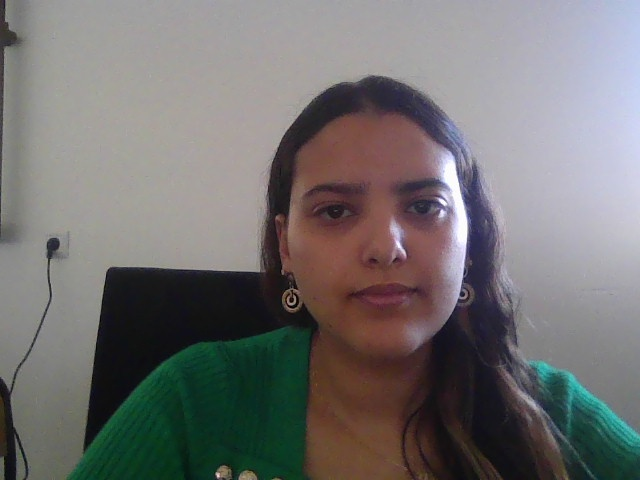

Image for WIAME_EL_HAFID saved to database.
front_image saved.
Please turn to your left side.
Please position yourself for the left_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing left_side_image...


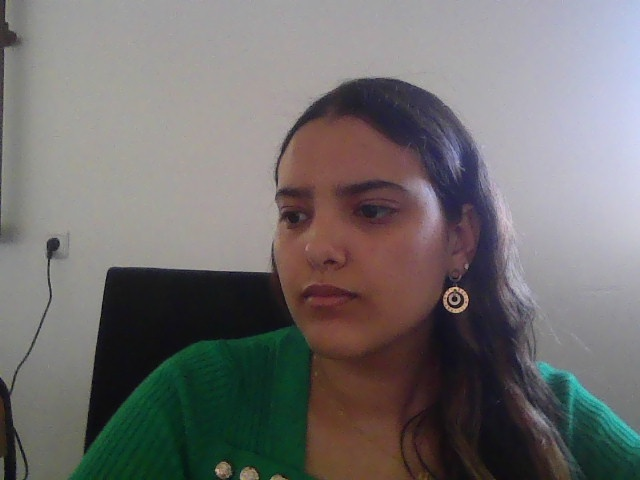

Retaking the left_side_image image.
Trial 2/3: 
Capturing left_side_image...


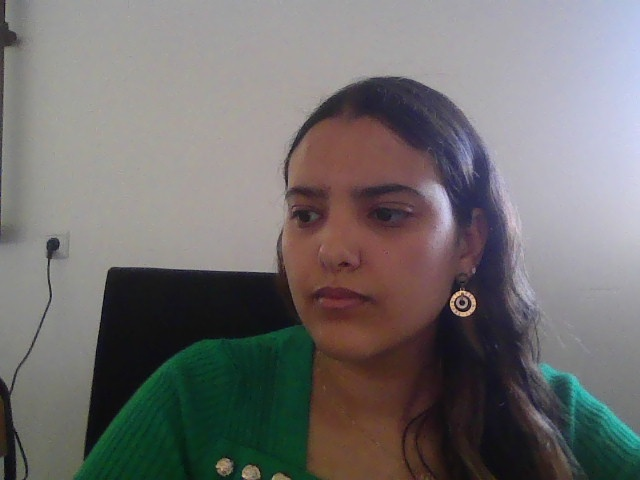

Retaking the left_side_image image.
Trial 3/3: 
Capturing left_side_image...


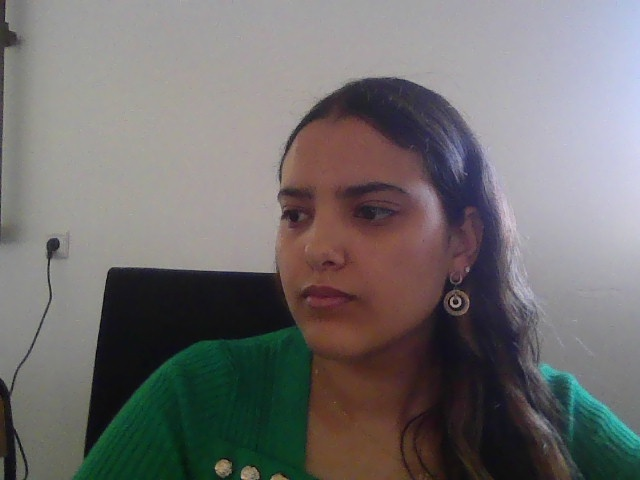

Retaking the left_side_image image.
Failed to capture left_side_image after 3 trials.
You have failed to capture a satisfactory image after 3 trials.
You can now choose one of the images you took:


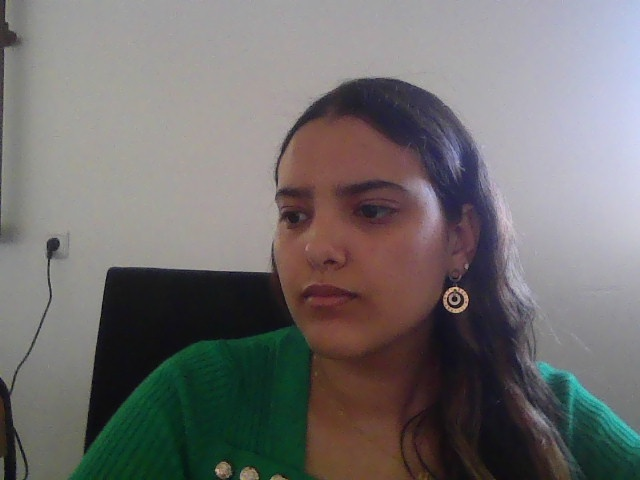

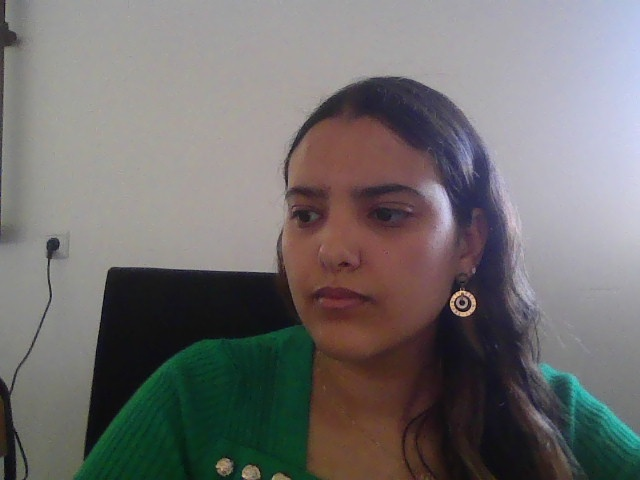

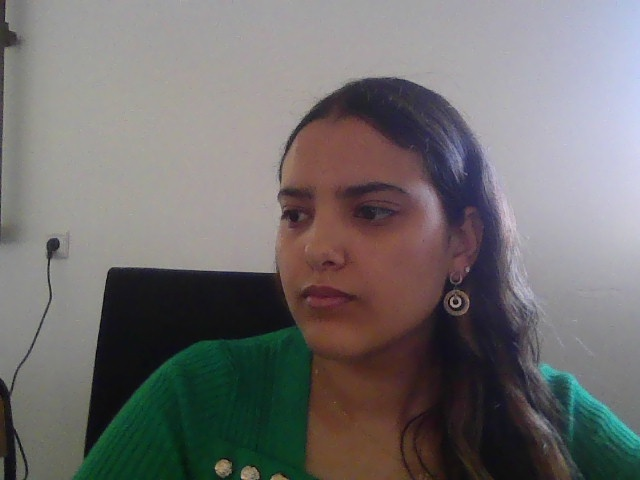

Image for WIAME_EL_HAFID saved to database.
Chosen left_side_image saved.
Please turn to your right side.
Please position yourself for the right_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing right_side_image...


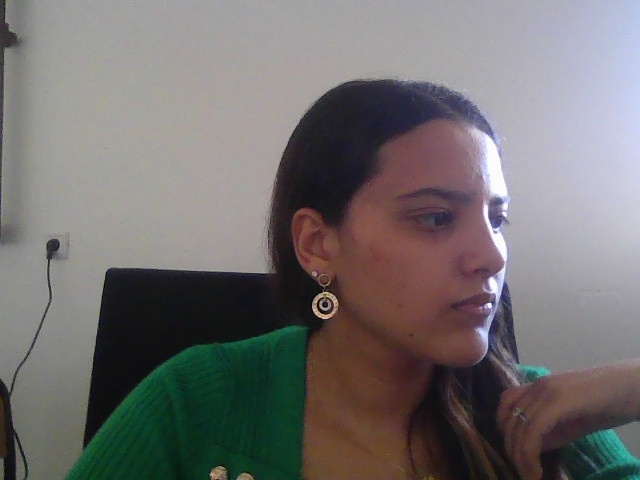

Retaking the right_side_image image.
Trial 2/3: 
Capturing right_side_image...


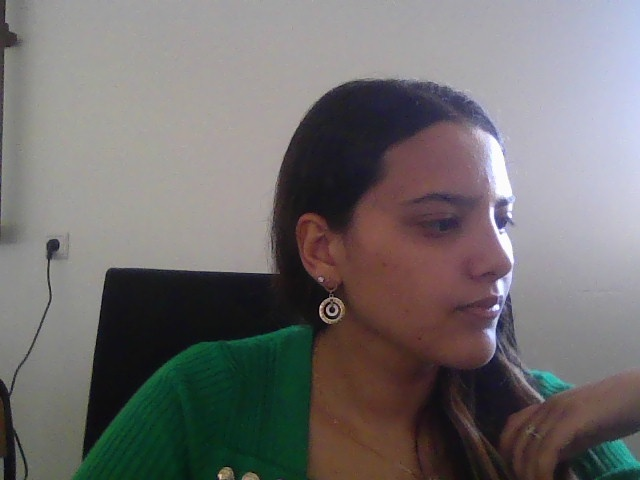

Image for WIAME_EL_HAFID saved to database.
right_side_image saved.


In [4]:
import cv2
import sqlite3
import numpy as np
import time
from IPython.display import Image, display

def save_image_to_db(image_name, image_array, name):
    """Saves the captured image to the SQLite database."""
    _, img_encoded = cv2.imencode('.jpg', image_array)
    img_binary = img_encoded.tobytes()

    # Connect to the SQLite database
    conn = sqlite3.connect('authorized_faces.db')
    cursor = conn.cursor()

    # Create table if it doesn't exist
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS authorized_faces (
            name TEXT,
            image BLOB
        )
    ''')

    # Insert the image as BLOB into the database
    cursor.execute('''
        INSERT INTO authorized_faces (name, image)
        VALUES (?, ?)
    ''', (name, img_binary))

    conn.commit()
    conn.close()
    print(f"Image for {name} saved to database.")

def capture_and_store_images():
    """Handles the image capture process."""
    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    # Give user time to get ready
    print("Getting ready to capture images...")
    time.sleep(2)

    def capture_image(name, image_name):
        print(f"Please position yourself for the {image_name}. You will be able to see yourself on the camera.")
        
        # Store all captured frames to allow user to choose later if needed
        captured_images = []
        
        for trial in range(3):  # Limit to 3 trials
            print(f"Trial {trial + 1}/3: ")

            # Show live feed for the user to adjust posture
            while True:
                ret, frame = video_capture.read()
                if ret:
                    cv2.imshow(f'Capture {image_name} - Position Yourself', frame)
                    key = cv2.waitKey(1) & 0xFF
                    if key == ord('c'):  # Wait for the user to press 'c' to take the picture
                        break
                else:
                    print("Failed to capture image. Try again.")
                    continue
            
            # Now that the user is ready, capture the image
            print(f"Capturing {image_name}...")
            ret, frame = video_capture.read()
            if ret:
                # Simulate showing the image using IPython display
                cv2.imwrite(f"{image_name}_trial{trial}.jpg", frame)  # Save the image temporarily
                cv2.destroyAllWindows()  # Close the live camera feed

                # Display the captured image to the user for feedback
                display(Image(filename=f"{image_name}_trial{trial}.jpg"))
                confirm = input(f"Do you like this {image_name}? (y/n): ").lower()

                if confirm == 'y':
                    save_image_to_db(image_name, frame, name)
                    print(f"{image_name} saved.")
                    break  # Exit the loop if user confirms the image
                else:
                    captured_images.append(frame)  # Store the rejected frame for later use
                    print(f"Retaking the {image_name} image.")  # Allow them to try again if they reject the photo
            else:
                print("Failed to capture image. Try again.")
                continue
        else:
            print(f"Failed to capture {image_name} after 3 trials.")

            # After 3 trials, ask the user to select one of the captured images
            print("You have failed to capture a satisfactory image after 3 trials.")
            print("You can now choose one of the images you took:")
            for i, img in enumerate(captured_images):
                cv2.imwrite(f"{image_name}_final_choice_{i}.jpg", img)  # Save images for user to choose
                display(Image(filename=f"{image_name}_final_choice_{i}.jpg"))
            
            choice = input(f"Please choose one image to save (enter the trial number: 0, 1, or 2): ").strip()
            if choice in ['0', '1', '2']:
                chosen_image = captured_images[int(choice)]
                save_image_to_db(image_name, chosen_image, name)
                print(f"Chosen {image_name} saved.")
            else:
                print("Invalid choice. No image saved.")

    # User inputs their name
    name = input("Enter the name of the person: ")

    # Capture front image
    capture_image(name, "front_image")

    # Capture left side image
    print("Please turn to your left side.")
    time.sleep(2)
    capture_image(name, "left_side_image")

    # Capture right side image
    print("Please turn to your right side.")
    time.sleep(2)
    capture_image(name, "right_side_image")

    # Release video capture and close all OpenCV windows
    video_capture.release()
    cv2.destroyAllWindows()

# Test the function
capture_and_store_images()


Getting ready to capture images...
Please position yourself for the front_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing front_image...


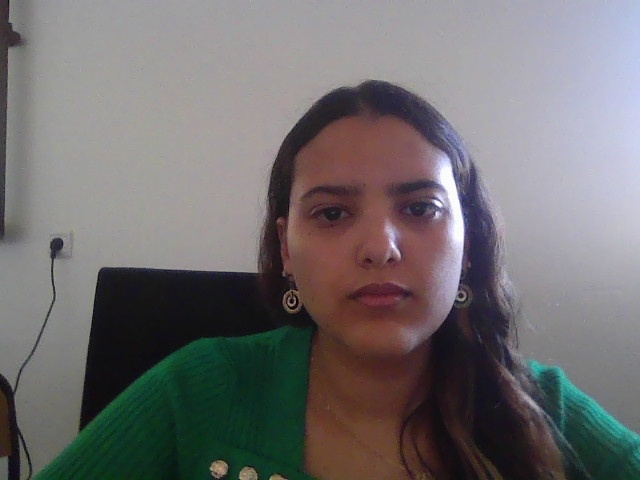

Image for WIAME_EL_HAFID saved at C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/WIAME_EL_HAFID_3A\front_image.jpg.
front_image saved.
Please turn to your left side.
Please position yourself for the left_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing left_side_image...


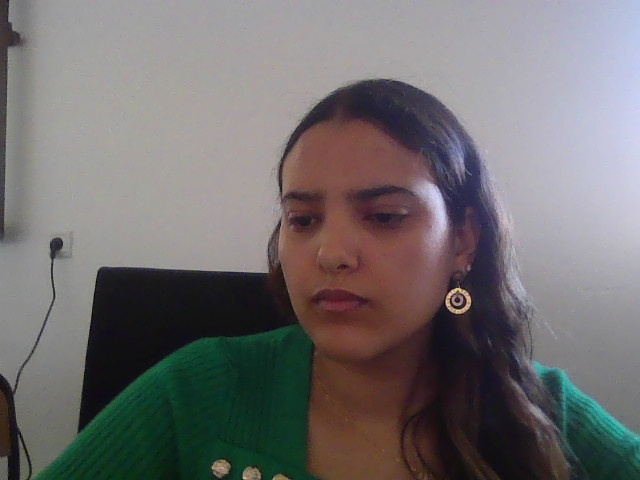

Retaking the left_side_image image.
Trial 2/3: 
Capturing left_side_image...


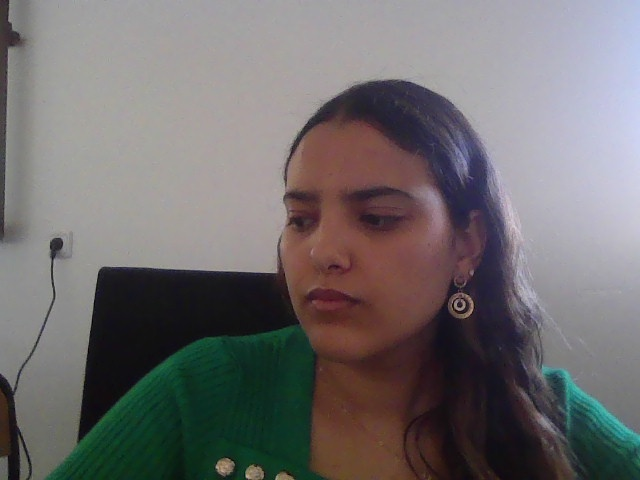

Image for WIAME_EL_HAFID saved at C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/WIAME_EL_HAFID_3A\left_side_image.jpg.
left_side_image saved.
Please turn to your right side.
Please position yourself for the right_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing right_side_image...


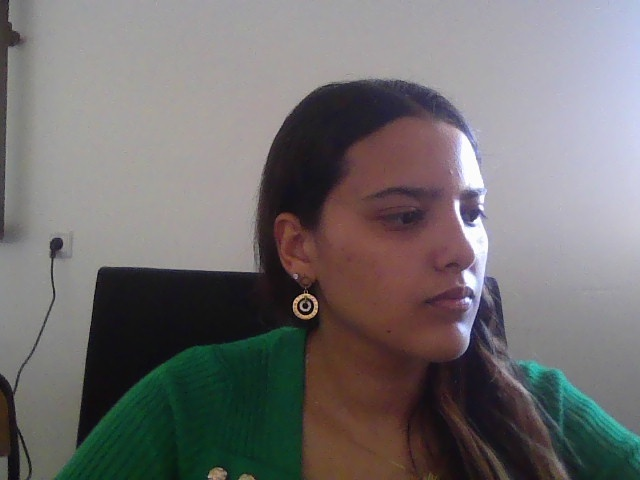

Retaking the right_side_image image.
Trial 2/3: 
Capturing right_side_image...


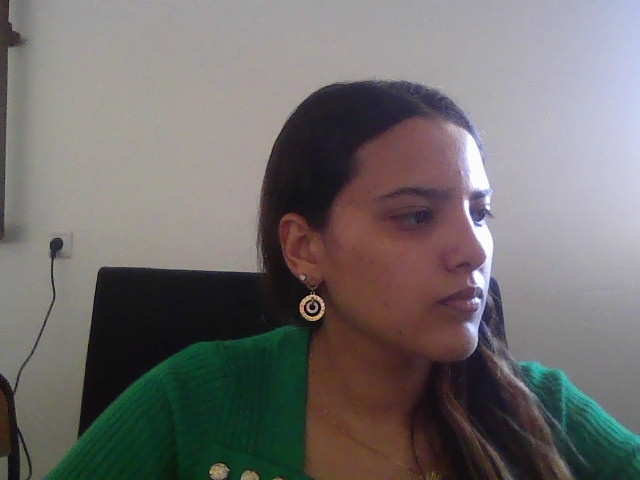

Retaking the right_side_image image.
Trial 3/3: 
Capturing right_side_image...


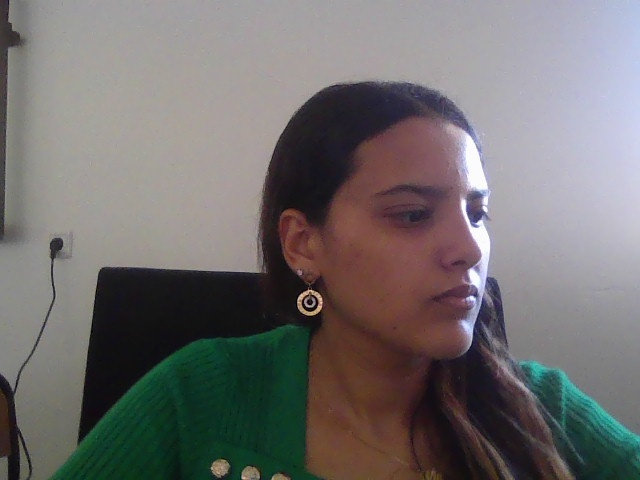

Retaking the right_side_image image.
Failed to capture right_side_image after 3 trials.
You have failed to capture a satisfactory image after 3 trials.
You can now choose one of the images you took: 


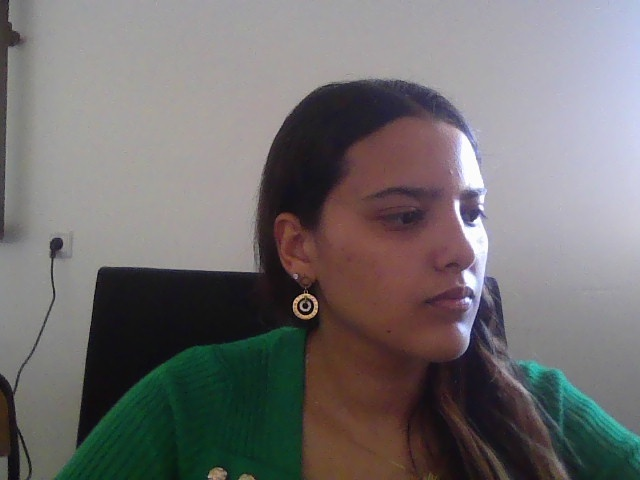

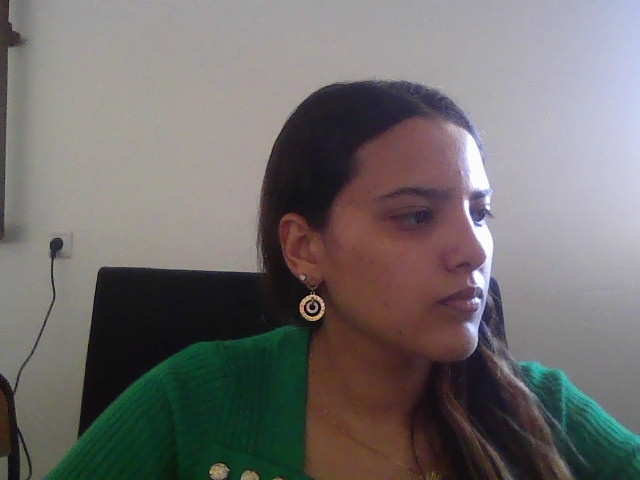

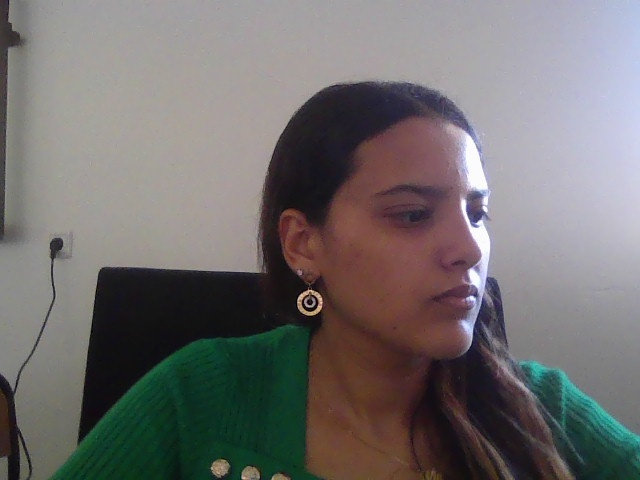

Image for WIAME_EL_HAFID saved at C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/WIAME_EL_HAFID_3A\right_side_image.jpg.
Chosen right_side_image saved.


In [1]:
import cv2
import os
import time
from IPython.display import Image, display

def save_image_to_folder(image_name, image_array, name, study_level):
    """Saves the captured image to a folder."""
    folder_path = f"C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/{name}_{study_level}"
    
    # Create folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    # Construct the image file path
    image_path = os.path.join(folder_path, f"{image_name}.jpg")
    
    # Save the image
    cv2.imwrite(image_path, image_array)
    print(f"Image for {name} saved at {image_path}.")

def capture_and_store_images():
    """Handles the image capture process."""
    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    # Give user time to get ready
    print("Getting ready to capture images...")
    time.sleep(2)

    def capture_image(name, study_level, image_name):
        print(f"Please position yourself for the {image_name}. You will be able to see yourself on the camera.")
        
        # Store all captured frames to allow user to choose later if needed
        captured_images = []
        
        for trial in range(3):  # Limit to 3 trials
            print(f"Trial {trial + 1}/3: ")

            # Show live feed for the user to adjust posture
            while True:
                ret, frame = video_capture.read()
                if ret:
                    cv2.imshow(f'Capture {image_name} - Position Yourself', frame)
                    key = cv2.waitKey(1) & 0xFF
                    if key == ord('c'):  # Wait for the user to press 'c' to take the picture
                        break
                else:
                    print("Failed to capture image. Try again.")
                    continue
            
            # Now that the user is ready, capture the image
            print(f"Capturing {image_name}...")
            ret, frame = video_capture.read()
            if ret:
                # Simulate showing the image using IPython display
                cv2.imwrite(f"{image_name}_trial{trial}.jpg", frame)  # Save the image temporarily
                cv2.destroyAllWindows()  # Close the live camera feed

                # Display the captured image to the user for feedback
                display(Image(filename=f"{image_name}_trial{trial}.jpg"))
                confirm = input(f"Do you like this {image_name}? (y/n): ").lower()

                if confirm == 'y':
                    save_image_to_folder(image_name, frame, name, study_level)
                    print(f"{image_name} saved.")
                    break  # Exit the loop if user confirms the image
                else:
                    captured_images.append(frame)  # Store the rejected frame for later use
                    print(f"Retaking the {image_name} image.")  # Allow them to try again if they reject the photo
            else:
                print("Failed to capture image. Try again.")
                continue
        else:
            print(f"Failed to capture {image_name} after 3 trials.")

            # After 3 trials, ask the user to select one of the captured images
            print("You have failed to capture a satisfactory image after 3 trials.")
            print("You can now choose one of the images you took: ")
            for i, img in enumerate(captured_images):
                cv2.imwrite(f"{image_name}_final_choice_{i}.jpg", img)  # Save images for user to choose
                display(Image(filename=f"{image_name}_final_choice_{i}.jpg"))
            
            choice = input(f"Please choose one image to save (enter the trial number: 0, 1, or 2): ").strip()
            if choice in ['0', '1', '2']:
                chosen_image = captured_images[int(choice)]
                save_image_to_folder(image_name, chosen_image, name, study_level)
                print(f"Chosen {image_name} saved.")
            else:
                print("Invalid choice. No image saved.")

    # User inputs their name and study level
    name = input("Enter the name of the person: ")
    study_level = input("Enter the study level (1A, 2A, 3A, 4A, 5A): ")

    # Capture front image
    capture_image(name, study_level, "front_image")

    # Capture left side image
    print("Please turn to your left side.")
    time.sleep(2)
    capture_image(name, study_level, "left_side_image")

    # Capture right side image
    print("Please turn to your right side.")
    time.sleep(2)
    capture_image(name, study_level, "right_side_image")

    # Release video capture and close all OpenCV windows
    video_capture.release()
    cv2.destroyAllWindows()

# Test the function
capture_and_store_images()


In [1]:
"""conn = sqlite3.connect('authorized_faces.db')
cursor = conn.cursor()
# Exécution des requêtes ici...
conn.commit()
conn.close()  # Fermez la connexion"""


"conn = sqlite3.connect('authorized_faces.db')\ncursor = conn.cursor()\n# Exécution des requêtes ici...\nconn.commit()\nconn.close()  # Fermez la connexion"

In [2]:
"""with sqlite3.connect('authorized_faces.db') as conn:
    cursor = conn.cursor()
    # Exécutez vos requêtes ici
"""

"with sqlite3.connect('authorized_faces.db') as conn:\n    cursor = conn.cursor()\n    # Exécutez vos requêtes ici\n"

Getting ready to capture images...
Please position yourself for the front_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing front_image...


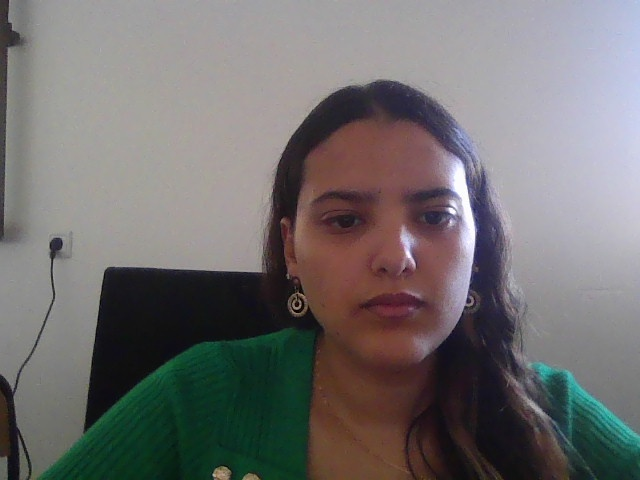

Image for WIWI_EL_HAFIS saved at C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/WIWI_EL_HAFIS_3A\front_image.jpg.
User WIWI_EL_HAFIS with study level 3A saved to database.
front_image saved.
Deleted front_image_trial0.jpg.
Please turn to your left side.
Please position yourself for the left_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing left_side_image...


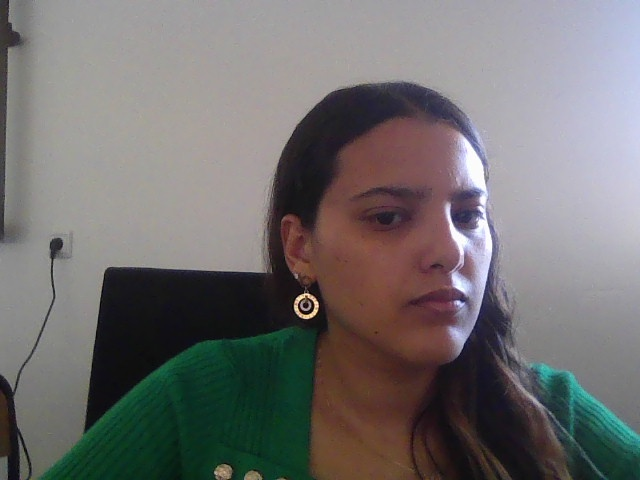

Retaking the left_side_image image.
Trial 2/3: 
Capturing left_side_image...


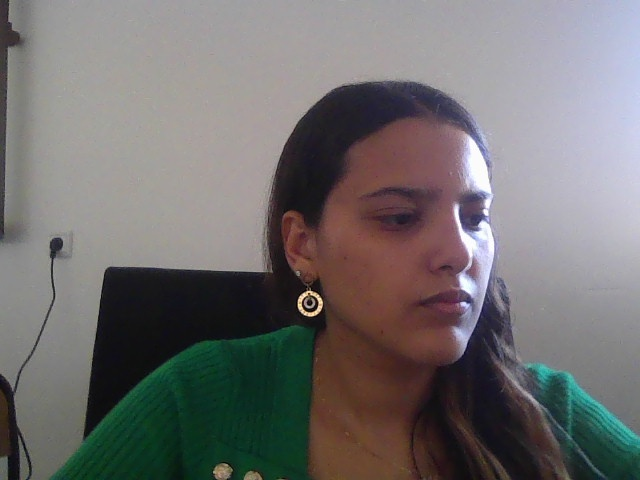

Retaking the left_side_image image.
Trial 3/3: 
Capturing left_side_image...


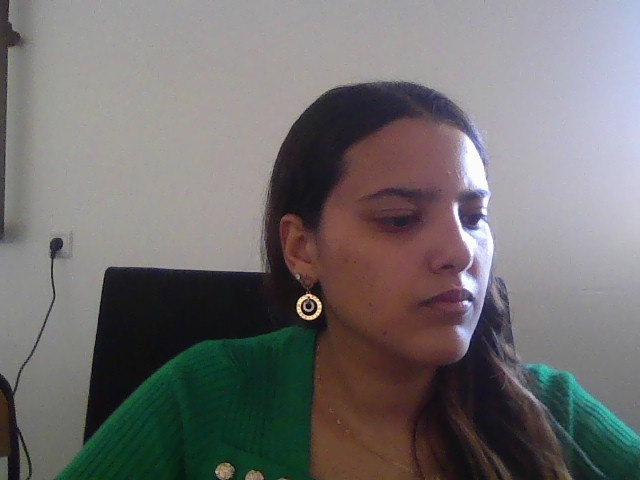

Retaking the left_side_image image.
Failed to capture left_side_image after 3 trials.
You have failed to capture a satisfactory image after 3 trials.
You can now choose one of the images you took: 


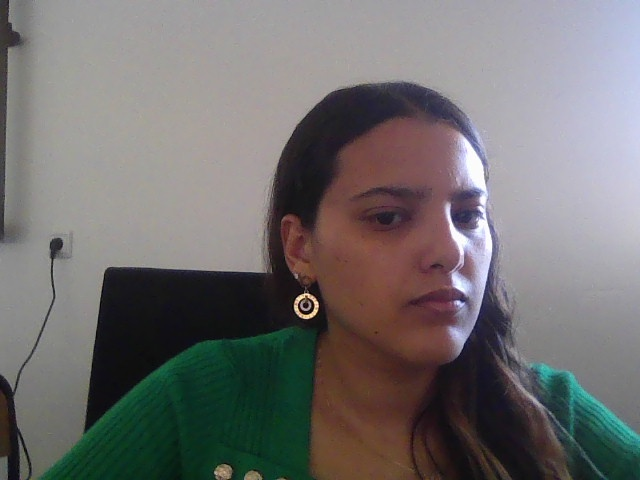

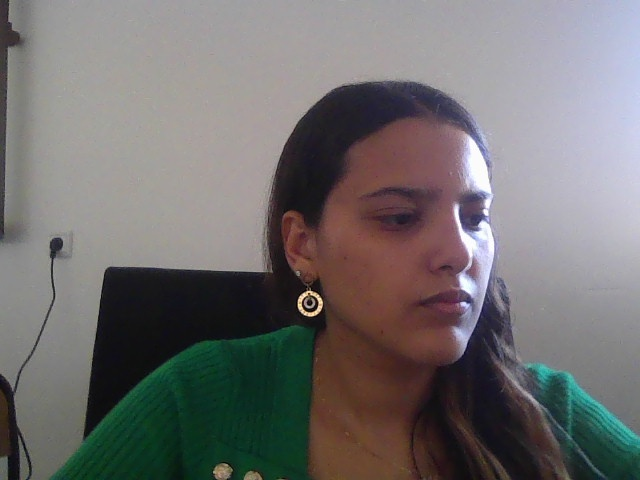

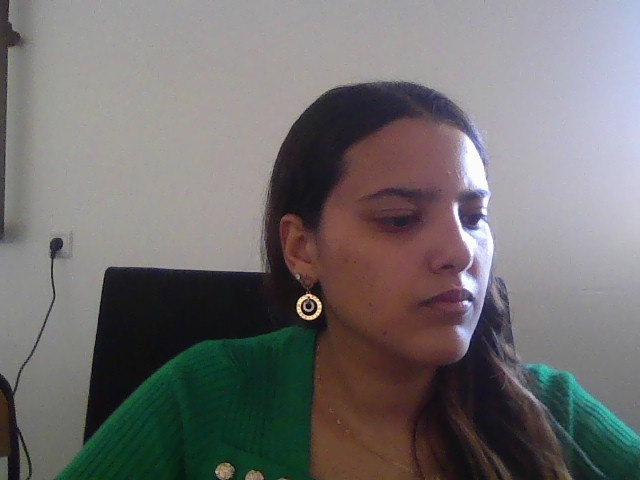

Image for WIWI_EL_HAFIS saved at C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/WIWI_EL_HAFIS_3A\left_side_image.jpg.
User WIWI_EL_HAFIS with study level 3A updated in the database.
Chosen left_side_image saved.
Deleted left_side_image_trial0.jpg.
Deleted left_side_image_trial1.jpg.
Deleted left_side_image_trial2.jpg.
Deleted left_side_image_final_choice_0.jpg.
Deleted left_side_image_final_choice_1.jpg.
Deleted left_side_image_final_choice_2.jpg.
Please turn to your right side.
Please position yourself for the right_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing right_side_image...


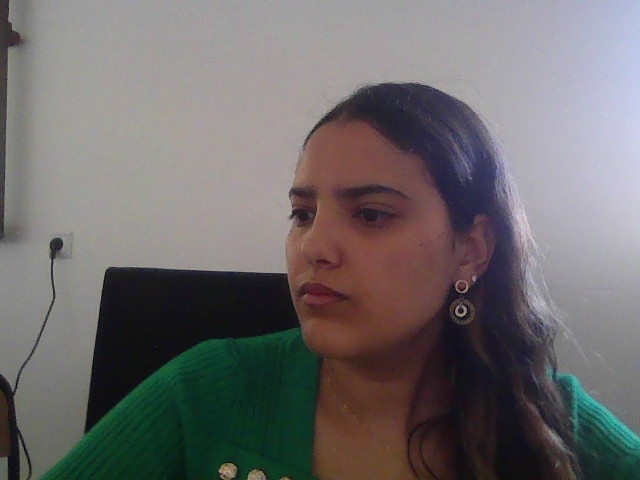

Retaking the right_side_image image.
Trial 2/3: 
Capturing right_side_image...


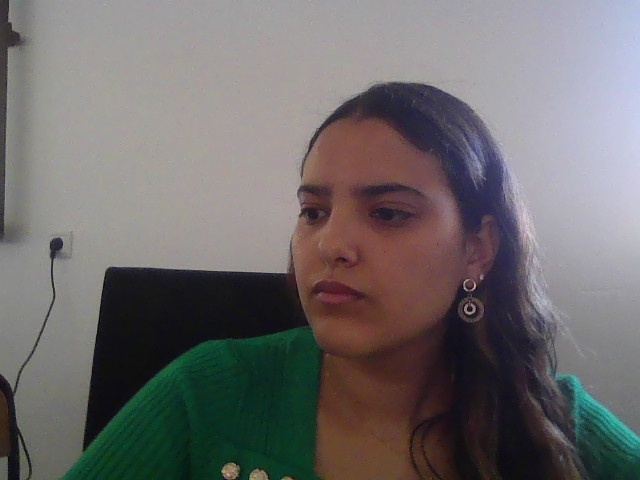

Image for WIWI_EL_HAFIS saved at C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/WIWI_EL_HAFIS_3A\right_side_image.jpg.
User WIWI_EL_HAFIS with study level 3A updated in the database.
right_side_image saved.
Deleted right_side_image_trial0.jpg.
Deleted right_side_image_trial1.jpg.


In [4]:
import cv2
import os
import sqlite3
import time
from IPython.display import Image, display
import numpy as np

def update_db_schema():
    """Ensure the database schema has the necessary columns."""
    try:
        conn = sqlite3.connect('authorized_faces.db')
        cursor = conn.cursor()

        # Create table if it doesn't exist
        cursor.execute('''CREATE TABLE IF NOT EXISTS users (
                            name TEXT,
                            study_level TEXT,
                            front_image_path TEXT,
                            left_side_image_path TEXT,
                            right_side_image_path TEXT,
                            front_image BLOB,
                            left_side_image BLOB,
                            right_side_image BLOB
                        )''')

        # Add missing columns if they don't exist
        cursor.execute('''PRAGMA table_info(users)''')
        columns = [column[1] for column in cursor.fetchall()]

        if 'front_image_path' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN front_image_path TEXT''')
        if 'left_side_image_path' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN left_side_image_path TEXT''')
        if 'right_side_image_path' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN right_side_image_path TEXT''')
        if 'front_image' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN front_image BLOB''')
        if 'left_side_image' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN left_side_image BLOB''')
        if 'right_side_image' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN right_side_image BLOB''')

        conn.commit()
    except sqlite3.OperationalError as e:
        print(f"Error updating the database schema: {e}")
    finally:
        conn.close()

def save_image_to_folder_and_db(image_name, image_array, name, study_level):
    """Saves the captured image to a folder and also stores the info in the SQLite database."""
    folder_path = f"C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/{name}_{study_level}"
    
    # Create folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    # Construct the image file path and save the image
    image_path = os.path.join(folder_path, f"{image_name}.jpg")
    cv2.imwrite(image_path, image_array)
    print(f"Image for {name} saved at {image_path}.")
    
    # Convert the image to BLOB format for database storage
    _, img_encoded = cv2.imencode('.jpg', image_array)
    img_blob = img_encoded.tobytes()
    
    try:
        conn = sqlite3.connect('authorized_faces.db')
        cursor = conn.cursor()

        # Check if the user already exists in the database
        cursor.execute('''SELECT * FROM users WHERE name = ? AND study_level = ?''', (name, study_level))
        user = cursor.fetchone()
        
        if user:
            # Update existing user's images and paths
            if image_name == "front_image":
                cursor.execute('''UPDATE users SET front_image_path = ?, front_image = ? WHERE name = ? AND study_level = ?''', 
                               (image_path, img_blob, name, study_level))
            elif image_name == "left_side_image":
                cursor.execute('''UPDATE users SET left_side_image_path = ?, left_side_image = ? WHERE name = ? AND study_level = ?''', 
                               (image_path, img_blob, name, study_level))
            elif image_name == "right_side_image":
                cursor.execute('''UPDATE users SET right_side_image_path = ?, right_side_image = ? WHERE name = ? AND study_level = ?''', 
                               (image_path, img_blob, name, study_level))

            print(f"User {name} with study level {study_level} updated in the database.")
        else:
            # Insert new user info and images
            cursor.execute('''INSERT INTO users (name, study_level, front_image_path, left_side_image_path, right_side_image_path,
                                                  front_image, left_side_image, right_side_image)
                              VALUES (?, ?, ?, ?, ?, ?, ?, ?)''', 
                           (name, study_level, image_path, image_path, image_path, img_blob, img_blob, img_blob))

            print(f"User {name} with study level {study_level} saved to database.")
        
        conn.commit()
        
    except sqlite3.OperationalError as e:
        print(f"Error saving to database: {e}")
    finally:
        # Close the database connection
        conn.close()

        # Adding a small delay to avoid database lock issues
        time.sleep(1)

def capture_and_store_images():
    """Handles the image capture process."""
    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    # Give user time to get ready
    print("Getting ready to capture images...")
    time.sleep(2)

    def capture_image(name, study_level, image_name):
        print(f"Please position yourself for the {image_name}. You will be able to see yourself on the camera.")
        
        # Store all captured frames to allow user to choose later if needed
        captured_images = []
        trial_images = []  # To keep track of trial images
        
        for trial in range(3):  # Limit to 3 trials
            print(f"Trial {trial + 1}/3: ")

            # Show live feed for the user to adjust posture
            while True:
                ret, frame = video_capture.read()
                if ret:
                    cv2.imshow(f'Capture {image_name} - Position Yourself', frame)
                    key = cv2.waitKey(1) & 0xFF
                    if key == ord('c'):  # Wait for the user to press 'c' to take the picture
                        break
                else:
                    print("Failed to capture image. Try again.")
                    continue
            
            # Now that the user is ready, capture the image
            print(f"Capturing {image_name}...")
            ret, frame = video_capture.read()
            if ret:
                # Save the image temporarily
                temp_image_path = f"{image_name}_trial{trial}.jpg"
                cv2.imwrite(temp_image_path, frame)
                trial_images.append(temp_image_path)  # Store the trial image paths
                cv2.destroyAllWindows()  # Close the live camera feed

                # Display the captured image to the user for feedback
                display(Image(filename=temp_image_path))
                confirm = input(f"Do you like this {image_name}? (y/n): ").lower()

                if confirm == 'y':
                    save_image_to_folder_and_db(image_name, frame, name, study_level)
                    print(f"{image_name} saved.")
                    
                    # Delete all other temporary images (trials)
                    for temp_image in trial_images:
                        if os.path.exists(temp_image):
                            os.remove(temp_image)
                            print(f"Deleted {temp_image}.")
                    break  # Exit the loop if user confirms the image
                else:
                    captured_images.append(frame)  # Store the rejected frame for later use
                    print(f"Retaking the {image_name} image.")  # Allow them to try again if they reject the photo
            else:
                print("Failed to capture image. Try again.")
                continue
        else:
            print(f"Failed to capture {image_name} after 3 trials.")

            # After 3 trials, ask the user to select one of the captured images
            print("You have failed to capture a satisfactory image after 3 trials.")
            print("You can now choose one of the images you took: ")
            for i, img in enumerate(captured_images):
                temp_image_path = f"{image_name}_final_choice_{i}.jpg"
                cv2.imwrite(temp_image_path, img)  # Save images for user to choose
                display(Image(filename=temp_image_path))
            
            choice = input(f"Please choose one image to save (enter the trial number: 0, 1, or 2): ").strip()
            if choice in ['0', '1', '2']:
                chosen_image = captured_images[int(choice)]
                save_image_to_folder_and_db(image_name, chosen_image, name, study_level)
                print(f"Chosen {image_name} saved.")
                
                # Delete all other temporary images (trials and choices)
                for temp_image in trial_images:
                    if os.path.exists(temp_image):
                        os.remove(temp_image)
                        print(f"Deleted {temp_image}.")
                for temp_image in [f"{image_name}_final_choice_{i}.jpg" for i in range(3)]:
                    if os.path.exists(temp_image):
                        os.remove(temp_image)
                        print(f"Deleted {temp_image}.")
            else:
                print("Invalid choice. No image saved.")

    # User inputs their name and study level
    name = input("Enter the name of the person: ")
    study_level = input("Enter the study level (1A, 2A, 3A, 4A, 5A): ")

    # Capture front image
    capture_image(name, study_level, "front_image")

    # Capture left side image
    print("Please turn to your left side.")
    time.sleep(2)
    capture_image(name, study_level, "left_side_image")

    # Capture right side image
    print("Please turn to your right side.")
    time.sleep(2)
    capture_image(name, study_level, "right_side_image")
    # Close the video capture
    video_capture.release()
    cv2.destroyAllWindows()

# Ensure the database schema is up to date
update_db_schema()

# Start capturing images
capture_and_store_images()


Getting ready to capture images...
Please position yourself for the front_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing front_image...


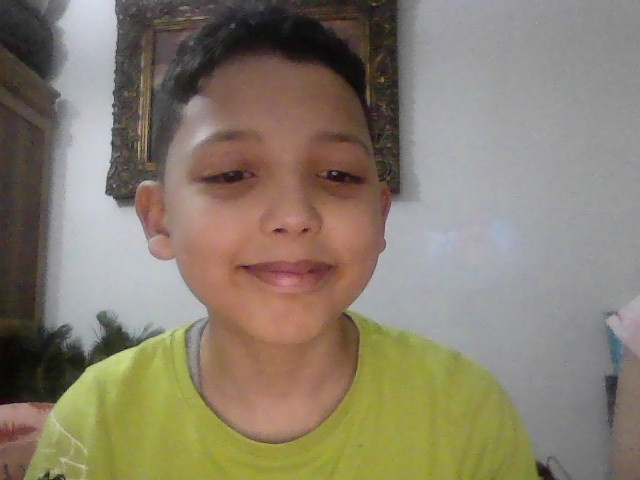

Retaking the front_image image.
Trial 2/3: 
Capturing front_image...


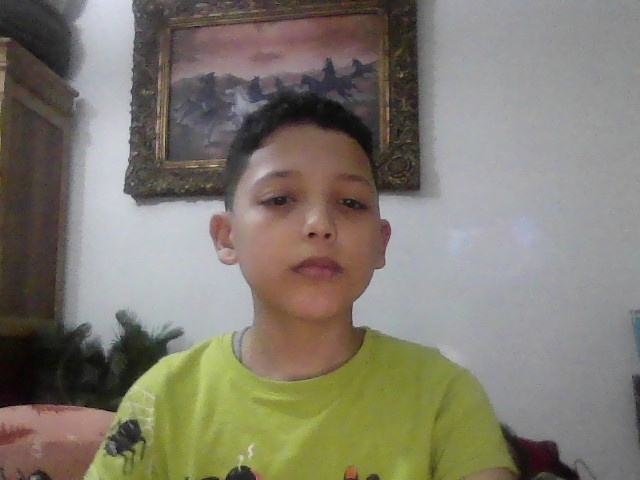

Image for MOHAMMED_EL_HAFID saved at C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/MOHAMMED_EL_HAFID_5A\front_image.jpg.
User MOHAMMED_EL_HAFID with study level 5A saved to database.
front_image saved.
Deleted front_image_trial0.jpg.
Deleted front_image_trial1.jpg.
Please turn to your left side.
Please position yourself for the left_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing left_side_image...


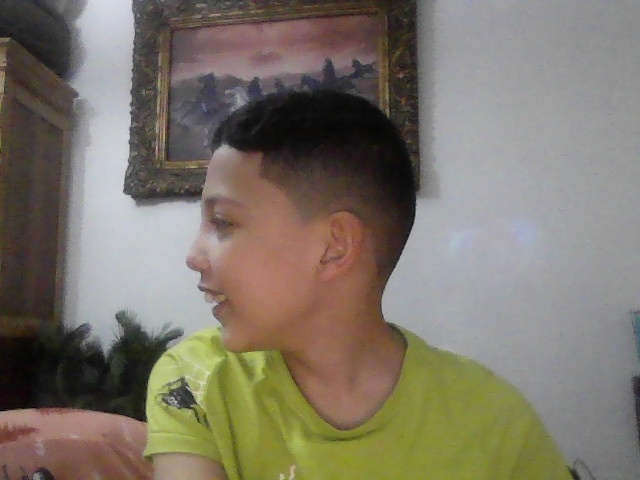

Retaking the left_side_image image.
Trial 2/3: 
Capturing left_side_image...


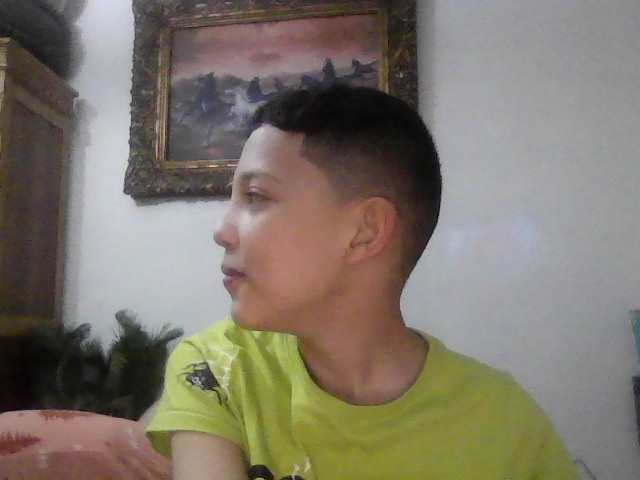

Retaking the left_side_image image.
Trial 3/3: 
Capturing left_side_image...


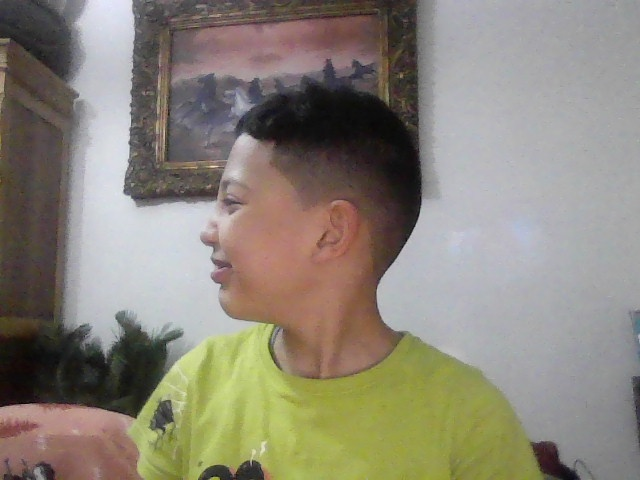

Retaking the left_side_image image.
Failed to capture left_side_image after 3 trials.
You have failed to capture a satisfactory image after 3 trials.
You can now choose one of the images you took: 


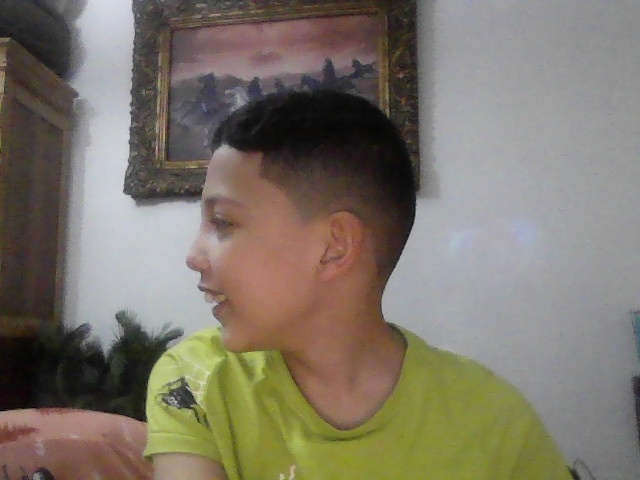

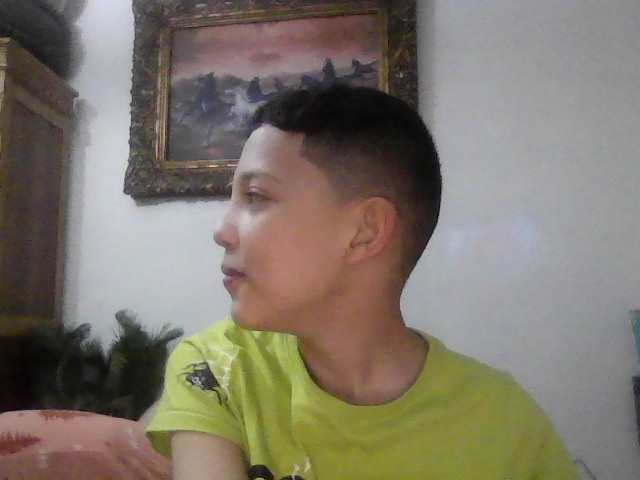

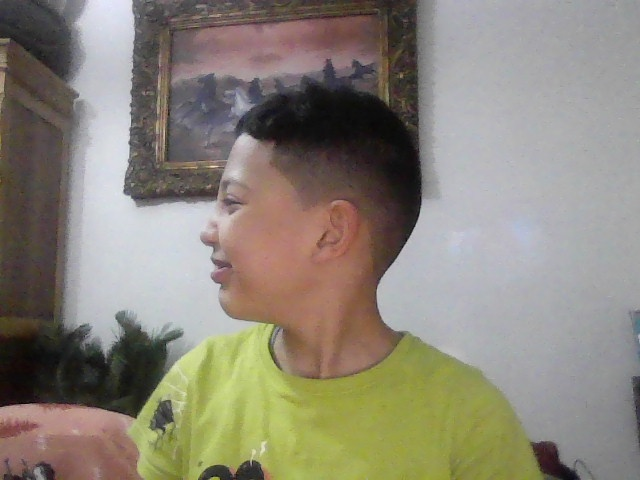

Image for MOHAMMED_EL_HAFID saved at C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/MOHAMMED_EL_HAFID_5A\left_side_image.jpg.
User MOHAMMED_EL_HAFID with study level 5A updated in the database.
Chosen left_side_image saved.
Deleted left_side_image_trial0.jpg.
Deleted left_side_image_trial1.jpg.
Deleted left_side_image_trial2.jpg.
Deleted left_side_image_final_choice_0.jpg.
Deleted left_side_image_final_choice_1.jpg.
Deleted left_side_image_final_choice_2.jpg.
Please turn to your right side.
Please position yourself for the right_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing right_side_image...


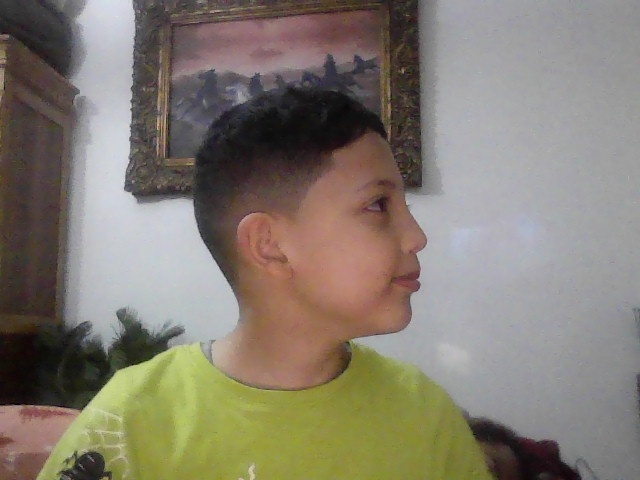

Image for MOHAMMED_EL_HAFID saved at C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/MOHAMMED_EL_HAFID_5A\right_side_image.jpg.
User MOHAMMED_EL_HAFID with study level 5A updated in the database.
right_side_image saved.
Deleted right_side_image_trial0.jpg.


In [1]:
import cv2
import os
import sqlite3
import time
from IPython.display import Image, display
import numpy as np

def update_db_schema():
    """Ensure the database schema has the necessary columns."""
    try:
        conn = sqlite3.connect('authorized_faces.db')
        cursor = conn.cursor()

        # Create table if it doesn't exist
        cursor.execute('''CREATE TABLE IF NOT EXISTS users (
                            name TEXT,
                            study_level TEXT,
                            front_image_path TEXT,
                            left_side_image_path TEXT,
                            right_side_image_path TEXT,
                            front_image BLOB,
                            left_side_image BLOB,
                            right_side_image BLOB
                        )''')

        # Add missing columns if they don't exist
        cursor.execute('''PRAGMA table_info(users)''')
        columns = [column[1] for column in cursor.fetchall()]

        if 'front_image_path' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN front_image_path TEXT''')
        if 'left_side_image_path' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN left_side_image_path TEXT''')
        if 'right_side_image_path' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN right_side_image_path TEXT''')
        if 'front_image' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN front_image BLOB''')
        if 'left_side_image' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN left_side_image BLOB''')
        if 'right_side_image' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN right_side_image BLOB''')

        conn.commit()
    except sqlite3.OperationalError as e:
        print(f"Error updating the database schema: {e}")
    finally:
        conn.close()

def save_image_to_folder_and_db(image_name, image_array, name, study_level):
    """Saves the captured image to a folder and also stores the info in the SQLite database."""
    folder_path = f"C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/{name}_{study_level}"
    
    # Create folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    # Construct the image file path and save the image
    image_path = os.path.join(folder_path, f"{image_name}.jpg")
    cv2.imwrite(image_path, image_array)
    print(f"Image for {name} saved at {image_path}.")
    
    # Convert the image to BLOB format for database storage
    _, img_encoded = cv2.imencode('.jpg', image_array)
    img_blob = img_encoded.tobytes()
    
    try:
        conn = sqlite3.connect('authorized_faces.db')
        cursor = conn.cursor()

        # Check if the user already exists in the database
        cursor.execute('''SELECT * FROM users WHERE name = ? AND study_level = ?''', (name, study_level))
        user = cursor.fetchone()
        
        if user:
            # Update existing user's images and paths
            if image_name == "front_image":
                cursor.execute('''UPDATE users SET front_image_path = ?, front_image = ? WHERE name = ? AND study_level = ?''', 
                               (image_path, img_blob, name, study_level))
            elif image_name == "left_side_image":
                cursor.execute('''UPDATE users SET left_side_image_path = ?, left_side_image = ? WHERE name = ? AND study_level = ?''', 
                               (image_path, img_blob, name, study_level))
            elif image_name == "right_side_image":
                cursor.execute('''UPDATE users SET right_side_image_path = ?, right_side_image = ? WHERE name = ? AND study_level = ?''', 
                               (image_path, img_blob, name, study_level))

            print(f"User {name} with study level {study_level} updated in the database.")
        else:
            # Insert new user info and images
            cursor.execute('''INSERT INTO users (name, study_level, front_image_path, left_side_image_path, right_side_image_path,
                                                  front_image, left_side_image, right_side_image)
                              VALUES (?, ?, ?, ?, ?, ?, ?, ?)''', 
                           (name, study_level, image_path, image_path, image_path, img_blob, img_blob, img_blob))

            print(f"User {name} with study level {study_level} saved to database.")
        
        conn.commit()
        
    except sqlite3.OperationalError as e:
        print(f"Error saving to database: {e}")
    finally:
        # Close the database connection
        conn.close()

        # Adding a small delay to avoid database lock issues
        time.sleep(1)

def capture_and_store_images():
    """Handles the image capture process."""
    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    # Give user time to get ready
    print("Getting ready to capture images...")
    time.sleep(2)

    def capture_image(name, study_level, image_name):
        print(f"Please position yourself for the {image_name}. You will be able to see yourself on the camera.")
        
        # Store all captured frames to allow user to choose later if needed
        captured_images = []
        trial_images = []  # To keep track of trial images
        
        for trial in range(3):  # Limit to 3 trials
            print(f"Trial {trial + 1}/3: ")

            # Show live feed for the user to adjust posture
            while True:
                ret, frame = video_capture.read()
                if ret:
                    cv2.imshow(f'Capture {image_name} - Position Yourself', frame)
                    key = cv2.waitKey(1) & 0xFF
                    if key == ord('c'):  # Wait for the user to press 'c' to take the picture
                        break
                else:
                    print("Failed to capture image. Try again.")
                    continue
            
            # Now that the user is ready, capture the image
            print(f"Capturing {image_name}...")
            ret, frame = video_capture.read()
            if ret:
                # Save the image temporarily
                temp_image_path = f"{image_name}_trial{trial}.jpg"
                cv2.imwrite(temp_image_path, frame)
                trial_images.append(temp_image_path)  # Store the trial image paths
                cv2.destroyAllWindows()  # Close the live camera feed

                # Display the captured image to the user for feedback
                display(Image(filename=temp_image_path))
                confirm = input(f"Do you like this {image_name}? (y/n): ").lower()

                if confirm == 'y':
                    save_image_to_folder_and_db(image_name, frame, name, study_level)
                    print(f"{image_name} saved.")
                    
                    # Delete all other temporary images (trials)
                    for temp_image in trial_images:
                        if os.path.exists(temp_image):
                            os.remove(temp_image)
                            print(f"Deleted {temp_image}.")
                    break  # Exit the loop if user confirms the image
                else:
                    captured_images.append(frame)  # Store the rejected frame for later use
                    print(f"Retaking the {image_name} image.")  # Allow them to try again if they reject the photo
            else:
                print("Failed to capture image. Try again.")
                continue
        else:
            print(f"Failed to capture {image_name} after 3 trials.")

            # After 3 trials, ask the user to select one of the captured images
            print("You have failed to capture a satisfactory image after 3 trials.")
            print("You can now choose one of the images you took: ")
            for i, img in enumerate(captured_images):
                temp_image_path = f"{image_name}_final_choice_{i}.jpg"
                cv2.imwrite(temp_image_path, img)  # Save images for user to choose
                display(Image(filename=temp_image_path))
            
            choice = input(f"Please choose one image to save (enter the trial number: 0, 1, or 2): ").strip()
            if choice in ['0', '1', '2']:
                chosen_image = captured_images[int(choice)]
                save_image_to_folder_and_db(image_name, chosen_image, name, study_level)
                print(f"Chosen {image_name} saved.")
                
                # Delete all other temporary images (trials and choices)
                for temp_image in trial_images:
                    if os.path.exists(temp_image):
                        os.remove(temp_image)
                        print(f"Deleted {temp_image}.")
                for temp_image in [f"{image_name}_final_choice_{i}.jpg" for i in range(3)]:
                    if os.path.exists(temp_image):
                        os.remove(temp_image)
                        print(f"Deleted {temp_image}.")
            else:
                print("Invalid choice. No image saved.")

    # User inputs their name and study level
    name = input("Enter the name of the person: ")
    study_level = input("Enter the study level (1A, 2A, 3A, 4A, 5A): ")

    # Capture front image
    capture_image(name, study_level, "front_image")

    # Capture left side image
    print("Please turn to your left side.")
    time.sleep(2)
    capture_image(name, study_level, "left_side_image")

    # Capture right side image
    print("Please turn to your right side.")
    time.sleep(2)
    capture_image(name, study_level, "right_side_image")
    # Close the video capture
    video_capture.release()
    cv2.destroyAllWindows()

# Ensure the database schema is up to date
update_db_schema()

# Start capturing images
capture_and_store_images()


Getting ready to capture images...
Please position yourself for the front_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing front_image...


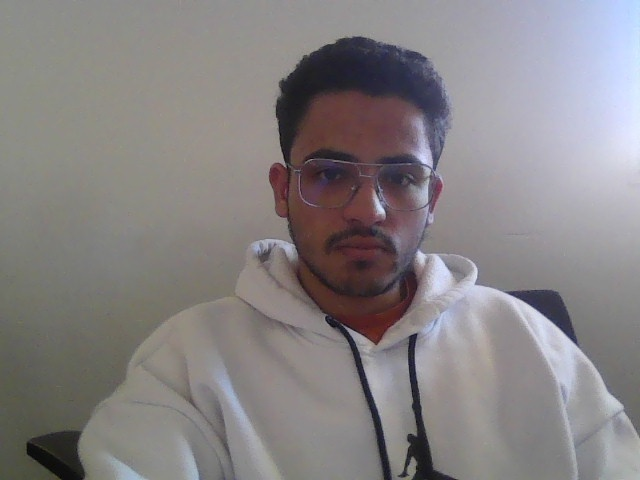

Image for Houssam_Rjili saved at C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/Houssam_Rjili_3A\front_image.jpg.
User Houssam_Rjili with study level 3A saved to database.
front_image saved.
Deleted front_image_trial0.jpg.
Please turn to your left side.
Please position yourself for the left_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing left_side_image...


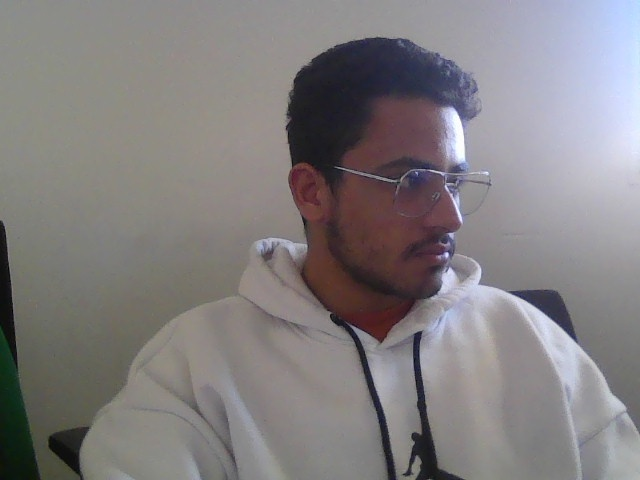

Retaking the left_side_image image.
Trial 2/3: 
Capturing left_side_image...


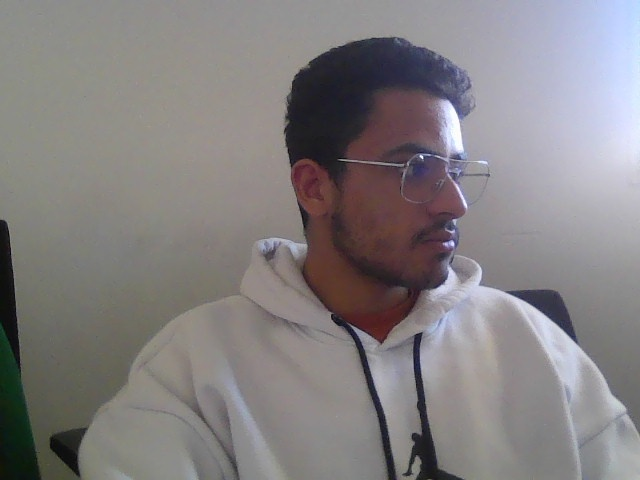

Image for Houssam_Rjili saved at C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/Houssam_Rjili_3A\left_side_image.jpg.
User Houssam_Rjili with study level 3A updated in the database.
left_side_image saved.
Deleted left_side_image_trial0.jpg.
Deleted left_side_image_trial1.jpg.
Please turn to your right side.
Please position yourself for the right_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing right_side_image...


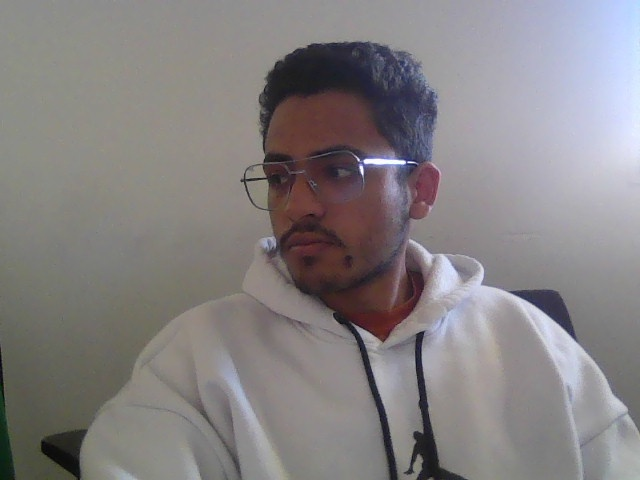

Retaking the right_side_image image.
Trial 2/3: 
Capturing right_side_image...


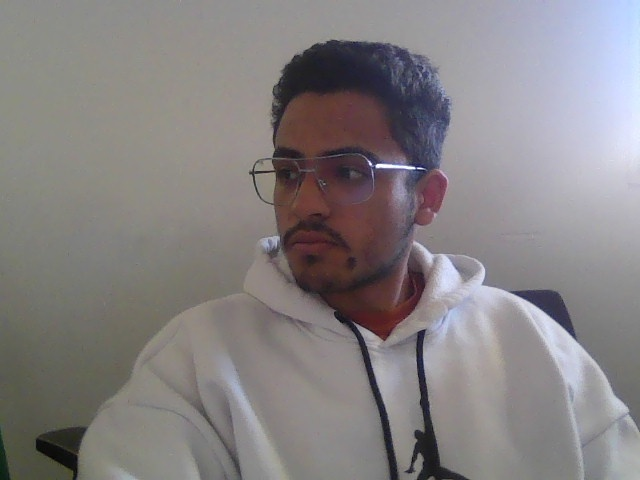

Retaking the right_side_image image.
Trial 3/3: 
Capturing right_side_image...


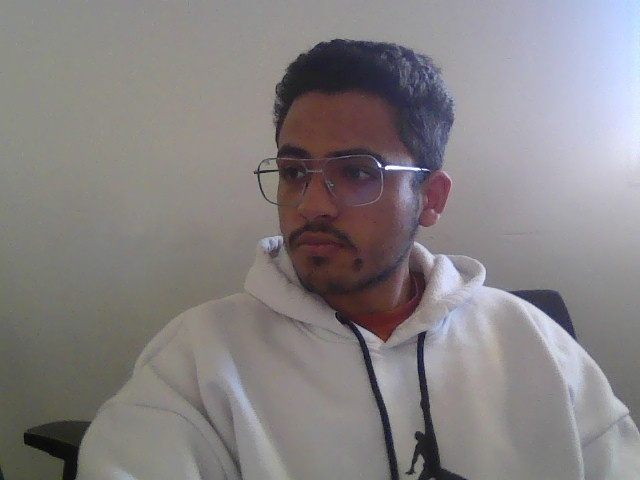

Retaking the right_side_image image.
Failed to capture right_side_image after 3 trials.
You have failed to capture a satisfactory image after 3 trials.
You can now choose one of the images you took: 


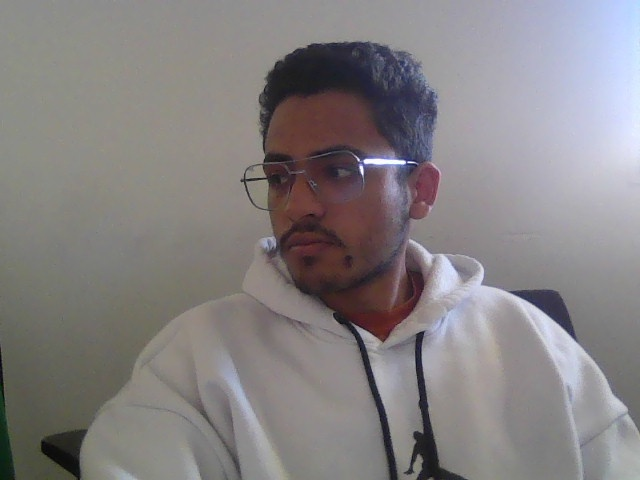

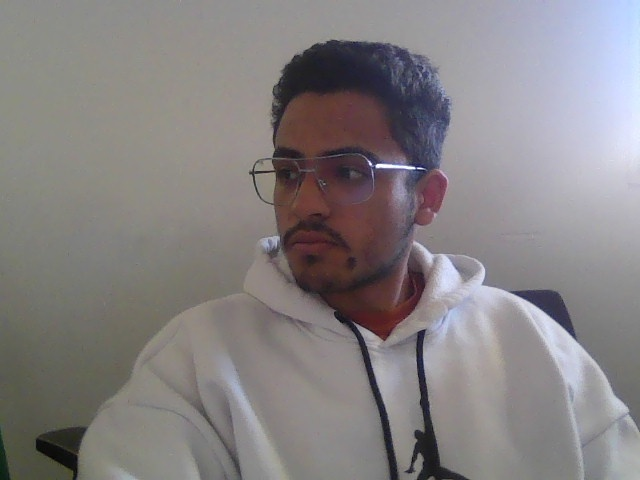

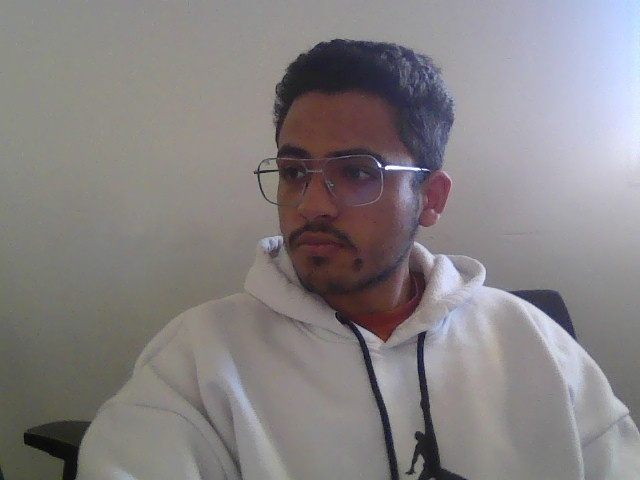

Image for Houssam_Rjili saved at C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/Houssam_Rjili_3A\right_side_image.jpg.
User Houssam_Rjili with study level 3A updated in the database.
Chosen right_side_image saved.
Deleted right_side_image_trial0.jpg.
Deleted right_side_image_trial1.jpg.
Deleted right_side_image_trial2.jpg.
Deleted right_side_image_final_choice_0.jpg.
Deleted right_side_image_final_choice_1.jpg.
Deleted right_side_image_final_choice_2.jpg.


In [6]:
import cv2
import os
import sqlite3
import time
from IPython.display import Image, display
import numpy as np

def update_db_schema():
    """Ensure the database schema has the necessary columns."""
    try:
        conn = sqlite3.connect('authorized_faces.db')
        cursor = conn.cursor()

        # Create table if it doesn't exist
        cursor.execute('''CREATE TABLE IF NOT EXISTS users (
                            name TEXT,
                            study_level TEXT,
                            front_image_path TEXT,
                            left_side_image_path TEXT,
                            right_side_image_path TEXT,
                            front_image BLOB,
                            left_side_image BLOB,
                            right_side_image BLOB
                        )''')

        # Add missing columns if they don't exist
        cursor.execute('''PRAGMA table_info(users)''')
        columns = [column[1] for column in cursor.fetchall()]

        if 'front_image_path' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN front_image_path TEXT''')
        if 'left_side_image_path' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN left_side_image_path TEXT''')
        if 'right_side_image_path' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN right_side_image_path TEXT''')
        if 'front_image' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN front_image BLOB''')
        if 'left_side_image' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN left_side_image BLOB''')
        if 'right_side_image' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN right_side_image BLOB''')

        conn.commit()
    except sqlite3.OperationalError as e:
        print(f"Error updating the database schema: {e}")
    finally:
        conn.close()

def save_image_to_folder_and_db(image_name, image_array, name, study_level):
    """Saves the captured image to a folder and also stores the info in the SQLite database."""
    folder_path = f"C:/Users/Wiam/Desktop/AI security alarm system/AI_Guard_Backend/{name}_{study_level}"
    
    # Create folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    # Construct the image file path and save the image
    image_path = os.path.join(folder_path, f"{image_name}.jpg")
    cv2.imwrite(image_path, image_array)
    print(f"Image for {name} saved at {image_path}.")
    
    # Convert the image to BLOB format for database storage
    _, img_encoded = cv2.imencode('.jpg', image_array)
    img_blob = img_encoded.tobytes()
    
    try:
        conn = sqlite3.connect('authorized_faces.db')
        cursor = conn.cursor()

        # Check if the user already exists in the database
        cursor.execute('''SELECT * FROM users WHERE name = ? AND study_level = ?''', (name, study_level))
        user = cursor.fetchone()
        
        if user:
            # Update existing user's images and paths
            if image_name == "front_image":
                cursor.execute('''UPDATE users SET front_image_path = ?, front_image = ? WHERE name = ? AND study_level = ?''', 
                               (image_path, img_blob, name, study_level))
            elif image_name == "left_side_image":
                cursor.execute('''UPDATE users SET left_side_image_path = ?, left_side_image = ? WHERE name = ? AND study_level = ?''', 
                               (image_path, img_blob, name, study_level))
            elif image_name == "right_side_image":
                cursor.execute('''UPDATE users SET right_side_image_path = ?, right_side_image = ? WHERE name = ? AND study_level = ?''', 
                               (image_path, img_blob, name, study_level))

            print(f"User {name} with study level {study_level} updated in the database.")
        else:
            # Insert new user info and images
            cursor.execute('''INSERT INTO users (name, study_level, front_image_path, left_side_image_path, right_side_image_path,
                                                  front_image, left_side_image, right_side_image)
                              VALUES (?, ?, ?, ?, ?, ?, ?, ?)''', 
                           (name, study_level, image_path, image_path, image_path, img_blob, img_blob, img_blob))

            print(f"User {name} with study level {study_level} saved to database.")
        
        conn.commit()
        
    except sqlite3.OperationalError as e:
        print(f"Error saving to database: {e}")
    finally:
        # Close the database connection
        conn.close()

        # Adding a small delay to avoid database lock issues
        time.sleep(1)

def capture_and_store_images():
    """Handles the image capture process."""
    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    # Give user time to get ready
    print("Getting ready to capture images...")
    time.sleep(2)

    def capture_image(name, study_level, image_name):
        print(f"Please position yourself for the {image_name}. You will be able to see yourself on the camera.")
        
        # Store all captured frames to allow user to choose later if needed
        captured_images = []
        trial_images = []  # To keep track of trial images
        
        for trial in range(3):  # Limit to 3 trials
            print(f"Trial {trial + 1}/3: ")

            # Show live feed for the user to adjust posture
            while True:
                ret, frame = video_capture.read()
                if ret:
                    cv2.imshow(f'Capture {image_name} - Position Yourself', frame)
                    key = cv2.waitKey(1) & 0xFF
                    if key == ord('c'):  # Wait for the user to press 'c' to take the picture
                        break
                else:
                    print("Failed to capture image. Try again.")
                    continue
            
            # Now that the user is ready, capture the image
            print(f"Capturing {image_name}...")
            ret, frame = video_capture.read()
            if ret:
                # Save the image temporarily
                temp_image_path = f"{image_name}_trial{trial}.jpg"
                cv2.imwrite(temp_image_path, frame)
                trial_images.append(temp_image_path)  # Store the trial image paths
                cv2.destroyAllWindows()  # Close the live camera feed

                # Display the captured image to the user for feedback
                display(Image(filename=temp_image_path))
                confirm = input(f"Do you like this {image_name}? (y/n): ").lower()

                if confirm == 'y':
                    save_image_to_folder_and_db(image_name, frame, name, study_level)
                    print(f"{image_name} saved.")
                    
                    # Delete all other temporary images (trials)
                    for temp_image in trial_images:
                        if os.path.exists(temp_image):
                            os.remove(temp_image)
                            print(f"Deleted {temp_image}.")
                    break  # Exit the loop if user confirms the image
                else:
                    captured_images.append(frame)  # Store the rejected frame for later use
                    print(f"Retaking the {image_name} image.")  # Allow them to try again if they reject the photo
            else:
                print("Failed to capture image. Try again.")
                continue
        else:
            print(f"Failed to capture {image_name} after 3 trials.")

            # After 3 trials, ask the user to select one of the captured images
            print("You have failed to capture a satisfactory image after 3 trials.")
            print("You can now choose one of the images you took: ")
            for i, img in enumerate(captured_images):
                temp_image_path = f"{image_name}_final_choice_{i}.jpg"
                cv2.imwrite(temp_image_path, img)  # Save images for user to choose
                display(Image(filename=temp_image_path))
            
            choice = input(f"Please choose one image to save (enter the trial number: 0, 1, or 2): ").strip()
            if choice in ['0', '1', '2']:
                chosen_image = captured_images[int(choice)]
                save_image_to_folder_and_db(image_name, chosen_image, name, study_level)
                print(f"Chosen {image_name} saved.")
                
                # Delete all other temporary images (trials and choices)
                for temp_image in trial_images:
                    if os.path.exists(temp_image):
                        os.remove(temp_image)
                        print(f"Deleted {temp_image}.")
                for temp_image in [f"{image_name}_final_choice_{i}.jpg" for i in range(3)]:
                    if os.path.exists(temp_image):
                        os.remove(temp_image)
                        print(f"Deleted {temp_image}.")
            else:
                print("Invalid choice. No image saved.")

    # User inputs their name and study level
    name = input("Enter the name of the person: ")
    study_level = input("Enter the study level (1A, 2A, 3A, 4A, 5A): ")

    # Capture front image
    capture_image(name, study_level, "front_image")

    # Capture left side image
    print("Please turn to your left side.")
    time.sleep(2)
    capture_image(name, study_level, "left_side_image")

    # Capture right side image
    print("Please turn to your right side.")
    time.sleep(2)
    capture_image(name, study_level, "right_side_image")
    # Close the video capture
    video_capture.release()
    cv2.destroyAllWindows()

# Ensure the database schema is up to date
update_db_schema()

# Start capturing images
capture_and_store_images()
